In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
dc_major = data.field('DC_maj')
lgz = data.field('LGZ_size')

In [5]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [6]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [8]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z))
Pw_g  = (power(Lum_dG,Flux_g,z))
Pw = power(Lum_d,flux_tot,z)


In [9]:
adj = np.where(Pw22>=4e43)
#adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz
Pw_g_H = array((Pw_g[adj])) # Optical luminosity >> This is the one to use to distinguish H & L

In [10]:
## Convert erg to J >>> WHz^-1
L_low_f = Pw_adj1*1e-7
L_mid_IR = Pw_adj*1e-7
L_opti = Pw_g_H*1e-7

z_new  = z[:5776,]


# Result of Crossmatch

In [11]:
hdul2 = fits.open('crossmatch1.fits')
data = hdul2[1].data
flux = data.field('Total_flux') # Obtain the total flux column 
redshift = data.field('z_best') # Obtain redshift column
flux_22 = data.field('w4Flux') # Obtain 22 microns flux
flux_g = data.field('gFApflux') # Obtain flux for g band

In [12]:
Q_d = array(cosmo.luminosity_distance([flux_g])*3.08567758e24) 
pw_g  = (power(Q_d,flux_g,redshift))
#Quasar_opti_P = Pw_g*1e-7


Lum_D = array(cosmo.luminosity_distance([flux])*3.08567758e24) 
pw = (power(Lum_D,flux,redshift))
#(1+redshift)**(-0.7)

Lum_D22 = array(cosmo.luminosity_distance([flux_22])*3.08567758e24)
pw22 = (power(Lum_D22,flux_22,redshift))

Adj = np.where(pw22>=4e43)

# FIND DATA FOR QUASARS

Quasar_mid_IR = array((pw22[Adj])*1e-7)
Quasar_Low_P = array((pw[Adj])*1e-7) 
Quasar_opti_P = array((pw_g[Adj])*1e-7)

z_QSO = redshift[:432,]


In [13]:
# FIND DATA FOR RADIO GALAXIES


RG_low = (set(L_low_f)-set(Quasar_Low_P))
P_RG_low  = array(list(RG_low))

RG_IR = (set(L_mid_IR)-set(Quasar_mid_IR))
P_RG_IR  = array(list(RG_IR))

RG_opti = (set(L_opti)-set(Quasar_opti_P))
P_RG_opti  = array(list(RG_opti))


z_RG = z[:5344,]

# Linear Size Classification

In [16]:
# Import desired parameters >>> DC_maj and LGZ size

dc_maj = data.field('DC_maj')
DC_maj = array(dc_maj)
A = data.field('LGZ_size')
LGZ = np.nan_to_num(A)
DC_MAJ = (np.nan_to_num(DC_maj))*2


# Calculate angular distance using python function

ad_QSO = array(cosmo.angular_diameter_distance(z_QSO)) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(z_RG))


In [17]:
dc_rg = (set(dc_major)-set(DC_maj))
DC_RG1  = array(list(dc_rg))

lgz_rg = (set(lgz)-set(A))
LGZ_RG1  = array(list(lgz_rg))

DC_RG = (np.nan_to_num(DC_RG1))*2   ### Deconvolved size for radio galaxies

LGZ_RG  = np.nan_to_num(LGZ_RG1)    ### LGZ for radio galaxies

In [19]:
## Loop that chooses LGZ instead of DC_maj for Quasars
for i in np.arange(len(DC_MAJ)):
    if (LGZ[i]==0):
        print (DC_MAJ)
    else:
        DC_MAJ[i] = LGZ[i]

[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472 19.43694895
 11.81471584]
[ 0.         39.33596014  0.         ... 64.66238472

In [20]:
for i in np.arange(len(DC_RG)):
    if (LGZ_RG[i]==0):
        print (DC_RG)
    else:
        DC_RG[i] = LGZ_RG[i]

[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643

In [21]:
def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size

In [22]:
a = DC_MAJ[DC_MAJ != 0]
a1 = DC_MAJ[:432,]
b = DC_RG[DC_RG != 0]
b1 = DC_RG[:5344,]

L_QSO = array(LZ(ad_QSO,a1))
L_RG = array(LZ(ad_RG,b1))

# Linear Size classification

In [285]:
def Binselect(p,q,r):
    Select = p[(p >= q) & (p <= r)]
    return array(Select)
Binselect(Total_P,1e23,1e26).shape

def Square(x,z,mn,mx):
    select = x[(z >= mn) & (z <= mx)]
    return array(select[:,2])


In [275]:
P_qso1 =  Binselect(Quasar_Low_P,1e23,1e26)
Z_qso1 = z_QSO[:254,]
a = L_QSO[L_QSO != 0]
L_qso1 = a[:254,]
Bin1_qso = np.vstack((P_qso1,Z_qso1,L_qso1)).T
bin1_qso = Bin1_qso[Bin1_qso[:,2].argsort()]


P_rg1 = Binselect(P_RG_low,1e23,1e26)
Z_rg1= z_RG[:2488,]
b = L_RG[L_RG != 0]
L_rg1 = b[:2488,]
Bin1_rg = np.vstack((P_rg1,Z_rg1,L_rg1)).T
bin1_rg = Bin1_rg[Bin1_rg[:,2].argsort()]

P_qso2 =  Binselect(Quasar_Low_P,1e26,1e28)
Z_qso2 = z_QSO[:106,]
L_qso2 = a[:106,]
Bin2_qso = np.vstack((P_qso2,Z_qso2,L_qso2)).T
bin2_qso = Bin2_qso[Bin2_qso[:,2].argsort()]

P_rg2 = Binselect(P_RG_low,1e26,1e28)
Z_rg2 = z_RG[:2313,]
L_rg2 = b[:2313,]
Bin2_rg = np.vstack((P_rg2,Z_rg2,L_rg2)).T
bin2_rg = Bin2_rg[Bin2_rg[:,2].argsort()]


P_qso3 =  Binselect(Quasar_Low_P,1e28,1e30)
Z_qso3= z_QSO[:31,]
L_qso3 = a[:31,]
Bin3_qso = np.vstack((P_qso3,Z_qso3,L_qso3)).T
bin3_qso = Bin3_qso[Bin3_qso[:,2].argsort()]

P_rg3 = Binselect(P_RG_low,1e28,1e30)
Z_rg3 = z_RG[:442,]
L_rg3 = b[:442,]
Bin3_rg = np.vstack((P_rg3,Z_rg3,L_rg3)).T
bin3_rg = Bin3_rg[Bin3_rg[:,2].argsort()]

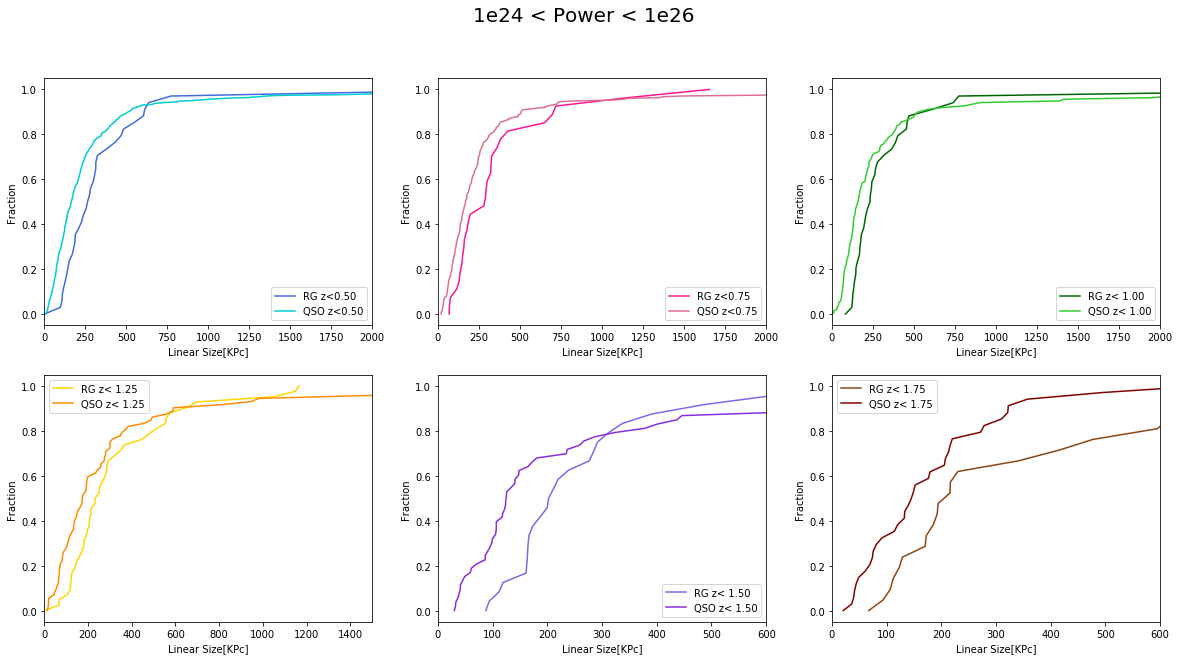

In [523]:


f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.plot(Square(bin1_qso,Z_qso1,0.25,0.50),np.linspace(0,1.0,num=35), c='royalblue',label='RG z<0.50')
ax1.plot(Square(bin1_rg,Z_rg1,0.25,0.50),np.linspace(0,1.0,num=584), c = 'darkturquoise', label = 'QSO z<0.50')
ax1.legend()
ax1.set_xlabel('Linear Size[KPc]')
ax1.set_ylabel('Fraction')
ax1.set_xlim(0,2000)

ax2.plot(Square(bin1_qso,Z_qso1,0.50,0.75),np.linspace(0,1.0,num=28), c='deeppink',label='RG z<0.75')
ax2.plot(Square(bin1_rg,Z_rg1,0.50,0.75),np.linspace(0,1.0,num=277), c = 'palevioletred', label = 'QSO z<0.75')
ax2.set_xlim(0,2000)
ax2.set_xlabel('Linear Size[KPc]')
ax2.set_ylabel('Fraction')
ax2.legend()

ax3.plot(Square(bin1_qso,Z_qso1,0.75,1.00),np.linspace(0,1.0,num=35), c='darkgreen',label='RG z< 1.00')
ax3.plot(Square(bin1_rg,Z_rg1,0.75,1.00),np.linspace(0,1.0,num=138), c = 'limegreen', label = 'QSO z< 1.00')
ax3.set_xlabel('Linear Size[KPc]')
ax3.set_ylabel('Fraction')
ax3.set_xlim(0,2000)
ax3.legend()

ax4.plot(Square(bin1_qso,Z_qso1,1.00,1.25),np.linspace(0,1.0,num=43), c='gold',label='RG z< 1.25')
ax4.plot(Square(bin1_rg,Z_rg1,1.00,1.25),np.linspace(0,1.0,num=73), c = 'darkorange', label = 'QSO z< 1.25')
ax4.set_xlim(0,1500)
ax4.set_xlabel('Linear Size[KPc]')
ax4.set_ylabel('Fraction')
ax4.legend()

ax5.plot(Square(bin1_qso,Z_qso1,1.25,1.50),np.linspace(0,1.0,num=25), c='mediumslateblue',label='RG z< 1.50')
ax5.plot(Square(bin1_rg,Z_rg1,1.25,1.50),np.linspace(0,1.0,num=54), c = 'blueviolet', label = 'QSO z< 1.50')
ax5.set_xlabel('Linear Size[KPc]')
ax5.set_ylabel('Fraction')
ax5.set_xlim(0,600)
ax5.legend(loc=4)

ax6.plot(Square(bin1_qso,Z_qso1,1.50,1.75),np.linspace(0,1.0,num=22), c='saddlebrown',label='RG z< 1.75')
ax6.plot(Square(bin1_rg,Z_rg1,1.50,1.75),np.linspace(0,1.0,num=35), c = 'maroon', label = 'QSO z< 1.75')
ax6.set_xlabel('Linear Size[KPc]')
ax6.set_ylabel('Fraction')
ax6.set_xlim(0,600)
ax6.legend()

plt.suptitle('1e24 < Power < 1e26', fontsize=20)
plt.savefig('Power<26.png')
plt.show()


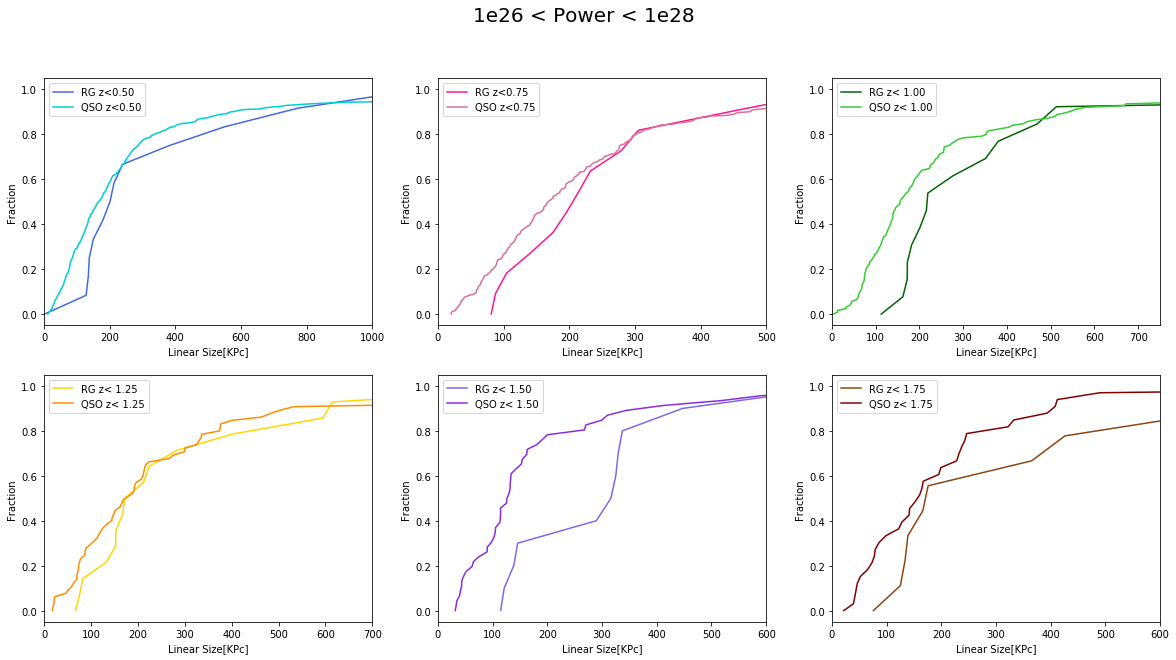

In [614]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.plot(Square(bin2_qso,Z_qso2,0.25,0.50),np.linspace(0,1.0,num=13), c='royalblue',label='RG z<0.50')
ax1.plot(Square(bin2_rg,Z_rg2,0.25,0.50),np.linspace(0,1.0,num=541), c = 'darkturquoise', label = 'QSO z<0.50')
ax1.legend()
ax1.set_xlabel('Linear Size[KPc]')
ax1.set_ylabel('Fraction')
ax1.set_xlim(0,1000)

ax2.plot(Square(bin2_qso,Z_qso2,0.50,0.75),np.linspace(0,1.0,num=12), c='deeppink',label='RG z<0.75')
ax2.plot(Square(bin2_rg,Z_rg2,0.50,0.75),np.linspace(0,1.0,num=253), c = 'palevioletred', label = 'QSO z<0.75')
ax2.set_xlim(0,500)
ax2.set_xlabel('Linear Size[KPc]')
ax2.set_ylabel('Fraction')
ax2.legend()

ax3.plot(Square(bin2_qso,Z_qso2,0.75,1.00),np.linspace(0,1.0,num=14), c='darkgreen',label='RG z< 1.00')
ax3.plot(Square(bin2_rg,Z_rg2,0.75,1.00),np.linspace(0,1.0,num=126), c = 'limegreen', label = 'QSO z< 1.00')
ax3.set_xlabel('Linear Size[KPc]')
ax3.set_ylabel('Fraction')
ax3.set_xlim(0,750)
ax3.legend()

ax4.plot(Square(bin2_qso,Z_qso2,1.00,1.25),np.linspace(0,1.0,num=15), c='gold',label='RG z< 1.25')
ax4.plot(Square(bin2_rg,Z_rg2,1.00,1.25),np.linspace(0,1.0,num=66), c = 'darkorange', label = 'QSO z< 1.25')
ax4.set_xlim(0,700)
ax4.set_xlabel('Linear Size[KPc]')
ax4.set_ylabel('Fraction')
ax4.legend()

ax5.plot(Square(bin2_qso,Z_qso2,1.25,1.50),np.linspace(0,1.0,num=11), c='mediumslateblue',label='RG z< 1.50')
ax5.plot(Square(bin2_rg,Z_rg2,1.25,1.50),np.linspace(0,1.0,num=47), c = 'blueviolet', label = 'QSO z< 1.50')
ax5.set_xlabel('Linear Size[KPc]')
ax5.set_ylabel('Fraction')
ax5.set_xlim(0,600)
ax5.legend(loc=2)

ax6.plot(Square(bin2_qso,Z_qso2,1.50,1.75),np.linspace(0,1.0,num=10), c='saddlebrown',label='RG z< 1.75')
ax6.plot(Square(bin2_rg,Z_rg2,1.50,1.75),np.linspace(0,1.0,num=34), c = 'maroon', label = 'QSO z< 1.75')
ax6.set_xlabel('Linear Size[KPc]')
ax6.set_ylabel('Fraction')
ax6.set_xlim(0,600)
ax6.legend()

plt.suptitle('1e26 < Power < 1e28', fontsize=20)
plt.savefig('Power<28.png')
plt.show()

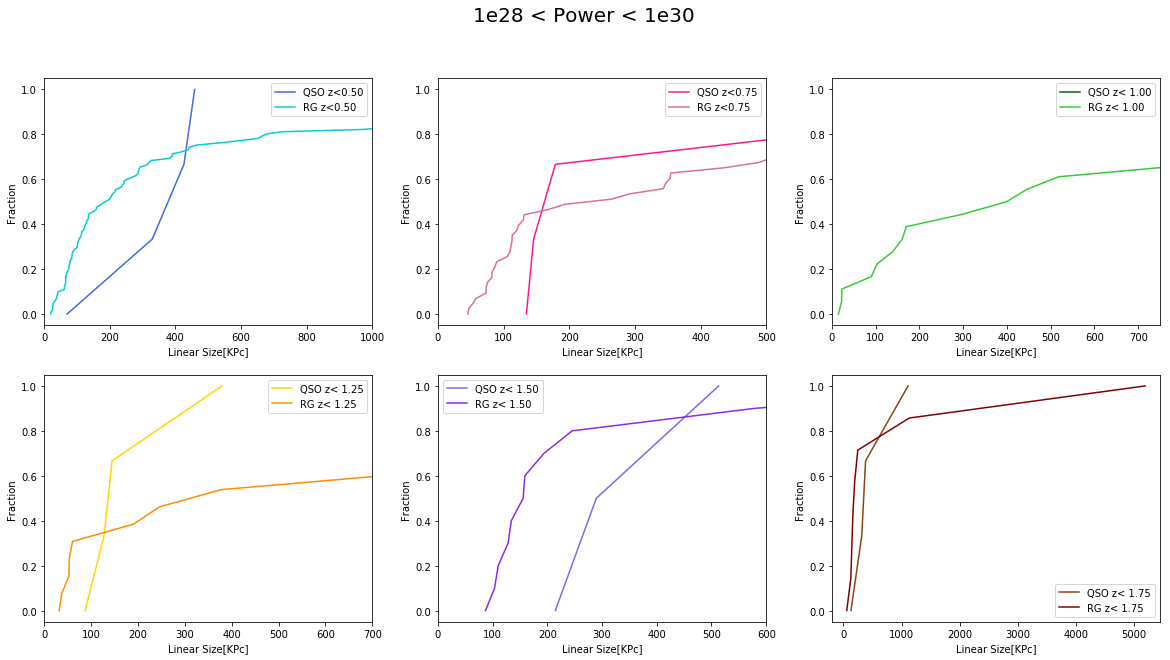

In [485]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.plot(Square(bin3_qso,Z_qso3,0.25,0.50),np.linspace(0,1.0,num=4), c='royalblue',label='QSO z<0.50')
ax1.plot(Square(bin3_rg,Z_rg3,0.25,0.50),np.linspace(0,1.0,num=102), c = 'darkturquoise', label = 'RG z<0.50')
ax1.legend()
ax1.set_xlabel('Linear Size[KPc]')
ax1.set_ylabel('Fraction')
ax1.set_xlim(0,1000)

ax2.plot(Square(bin3_qso,Z_qso3,0.50,0.75),np.linspace(0,1.0,num=4), c='deeppink',label='QSO z<0.75')
ax2.plot(Square(bin3_rg,Z_rg3,0.50,0.75),np.linspace(0,1.0,num=44), c = 'palevioletred', label = 'RG z<0.75')
ax2.set_xlim(0,500)
ax2.set_xlabel('Linear Size[KPc]')
ax2.set_ylabel('Fraction')
ax2.legend()

ax3.plot(Square(bin3_qso,Z_qso3,0.75,1.00),np.linspace(0,1.0,num=1), c='darkgreen',label='QSO z< 1.00')
ax3.plot(Square(bin3_rg,Z_rg3,0.75,1.00),np.linspace(0,1.0,num=19), c = 'limegreen', label = 'RG z< 1.00')
ax3.set_xlabel('Linear Size[KPc]')
ax3.set_ylabel('Fraction')
ax3.set_xlim(0,750)
ax3.legend()

ax4.plot(Square(bin3_qso,Z_qso3,1.00,1.25),np.linspace(0,1.0,num=4), c='gold',label='QSO z< 1.25')
ax4.plot(Square(bin3_rg,Z_rg3,1.00,1.25),np.linspace(0,1.0,num=14), c = 'darkorange', label = 'RG z< 1.25')
ax4.set_xlim(0,700)
ax4.set_xlabel('Linear Size[KPc]')
ax4.set_ylabel('Fraction')
ax4.legend()

ax5.plot(Square(bin3_qso,Z_qso3,1.25,1.50),np.linspace(0,1.0,num=3), c='mediumslateblue',label='QSO z< 1.50')
ax5.plot(Square(bin3_rg,Z_rg3,1.25,1.50),np.linspace(0,1.0,num=11), c = 'blueviolet', label = 'RG z< 1.50')
ax5.set_xlabel('Linear Size[KPc]')
ax5.set_ylabel('Fraction')
ax5.set_xlim(0,600)
ax5.legend(loc=2)

ax6.plot(Square(bin3_qso,Z_qso3,1.50,1.75),np.linspace(0,1.0,num=4), c='saddlebrown',label='QSO z< 1.75')
ax6.plot(Square(bin3_rg,Z_rg3,1.50,1.75),np.linspace(0,1.0,num=8), c = 'maroon', label = 'RG z< 1.75')
ax6.set_xlabel('Linear Size[KPc]')
ax6.set_ylabel('Fraction')
#ax6.set_xlim(0,600)
ax6.legend()

plt.suptitle('1e28 < Power < 1e30', fontsize=20)
plt.savefig('Power<30.png')
plt.show()

In [232]:
Square(bin3_rg,Z_rg3,1.75,2.00).shape

(9,)

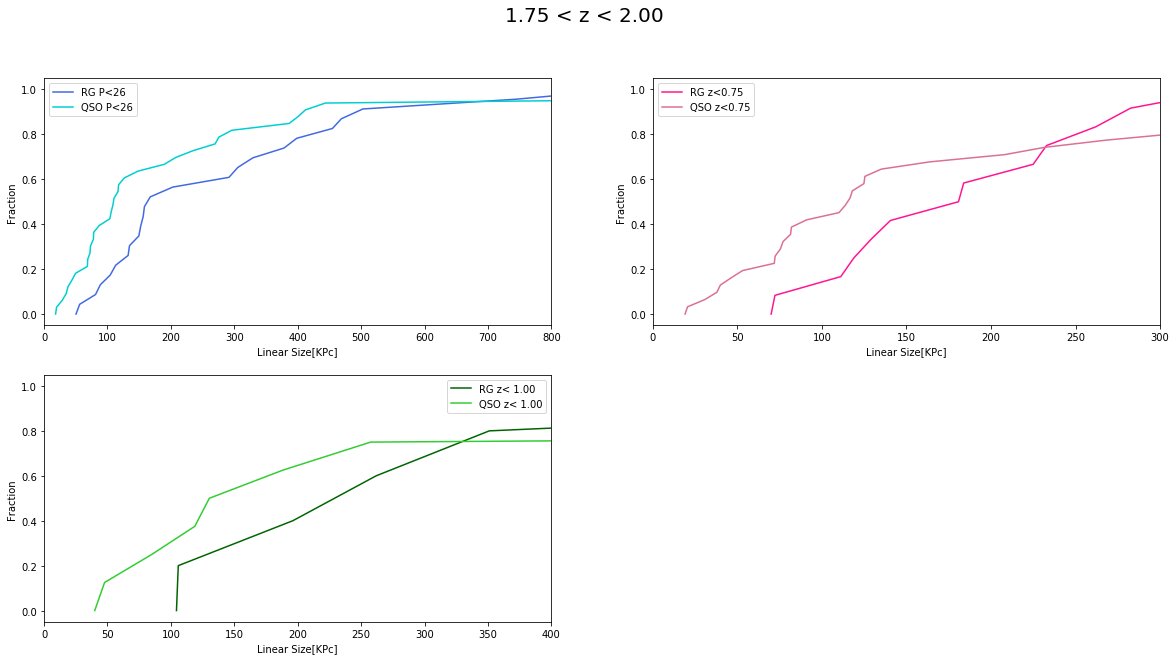

In [526]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 =  f.add_subplot(223)



ax1.plot(Square(bin1_qso,Z_qso1,1.75,2.00),np.linspace(0,1.0,num=24), c='royalblue',label='RG P<26')
ax1.plot(Square(bin1_rg,Z_rg1,1.75,2.00),np.linspace(0,1.0,num=34), c = 'darkturquoise', label = 'QSO P<26')
ax1.legend()
ax1.set_xlabel('Linear Size[KPc]')
ax1.set_ylabel('Fraction')
ax1.set_xlim(0,800)

ax2.plot(Square(bin2_qso,Z_qso2,1.75,2.00),np.linspace(0,1.0,num=13), c='deeppink',label='RG z<0.75')
ax2.plot(Square(bin2_rg,Z_rg2,1.75,2.00),np.linspace(0,1.0,num=32), c = 'palevioletred', label = 'QSO z<0.75')
ax2.set_xlim(0,300)
ax2.set_xlabel('Linear Size[KPc]')
ax2.set_ylabel('Fraction')
ax2.legend()

ax3.plot(Square(bin3_qso,Z_qso3,1.75,2.00),np.linspace(0,1.0,num=6), c='darkgreen',label='RG z< 1.00')
ax3.plot(Square(bin3_rg,Z_rg3,1.75,2.00),np.linspace(0,1.0,num=9), c = 'limegreen', label = 'QSO z< 1.00')
ax3.set_xlabel('Linear Size[KPc]')
ax3.set_ylabel('Fraction')
ax3.set_xlim(0,400)
ax3.legend()


plt.suptitle('1.75 < z < 2.00', fontsize=20)
plt.savefig('z<2.png')
plt.show()

# Linear Size Ratio

In [516]:
import statistics 

def Median(x,z,mn,mx):
    value = x[(z >= mn) & (z <= mx)]
    return statistics.median(value[:,2])
def median(x,z,mn,mx,n):
    v = x[(z >= mn) & (z <= mx)]
    return statistics.median(v[:n,2])

def Selection(x,z,mn,mx):
    Value = x[(z >= mn) & (z <= mx)]
    return array(Value[:,0])

In [455]:
p1 = Binselect(L_low_f,1e23,1e26)
z1 = z_new[:2742,]
pz1 = np.vstack((p1,z1)).T

p2 = Binselect(L_low_f,1e26,1e28)
z2 = z_new[:2419,]
pz2 = np.vstack((p2,z2)).T

p3 = Binselect(L_low_f,1e28,1e30)
z3 = z_new[:473,]
pz3 = np.vstack((p3,z3)).T

In [323]:
Binselect(L_low_f,1e28,1e30).shape

(473,)

Text(0.5,0.98,'1e24 < Power < 1e26')

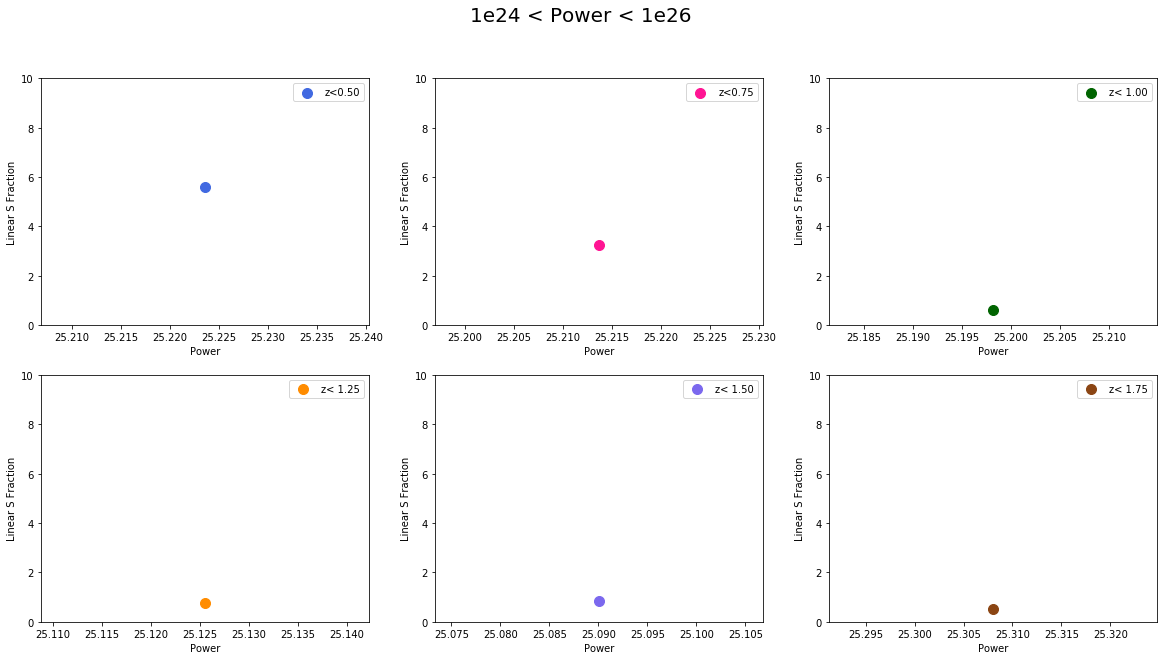

In [587]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.scatter(np.log10(1.673305612552026e+25),5.5840629750968604, c='royalblue',s = 100,label='z<0.50')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(1.6355087347535477e+25),3.259636633124914, c='deeppink',s = 100, label='z<0.75')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.set_ylim(0,10)
ax2.legend()

ax3.scatter(np.log10(1.578221605744241e+25),0.6348409901261115, c='darkgreen',s=100,label='z< 1.00')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()

ax4.scatter(np.log10(1.3351084562736022e+25),0.758932272791565, s = 100, c = 'darkorange', label = 'z< 1.25')
ax4.set_ylim(0,10)
ax4.set_xlabel('Power')
ax4.set_ylabel('Linear S Fraction')
ax4.legend(loc=1)

ax5.scatter(np.log10(1.2303887393650335e+25),0.8552331397856036, s = 100,c='mediumslateblue',label='z< 1.50')
ax5.set_xlabel('Power')
ax5.set_ylabel('Linear S Fraction')
ax5.set_ylim(0,10)
ax5.legend(loc=1)

ax6.scatter(np.log10(2.032265728777818e+25),0.5316802766535258,s =100, c='saddlebrown',label='z< 1.75')
ax6.set_xlabel('Power')
ax6.set_ylabel('Linear S Fraction')
ax6.set_ylim(0,10)
ax6.legend()

plt.suptitle('1e24 < Power < 1e26', fontsize=20)

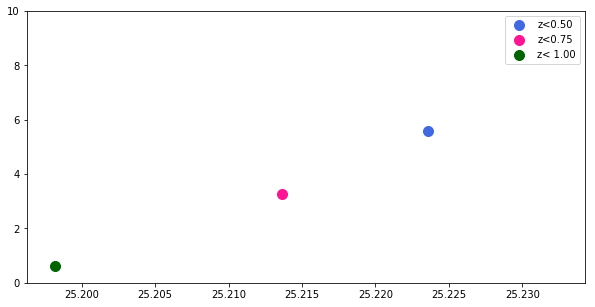

In [563]:
plt.figure(figsize = (10,5))

plt.scatter(np.log10(1.673305612552026e+25),5.5840629750968604, c='royalblue',s = 100,label='z<0.50')
plt.scatter(np.log10(1.6355087347535477e+25),3.259636633124914, c='deeppink',s = 100, label='z<0.75')
plt.scatter(np.log10(1.578221605744241e+25),0.6348409901261115, c='darkgreen',s=100,label='z< 1.00')
plt.ylim(0,10)
plt.legend()
plt.show()


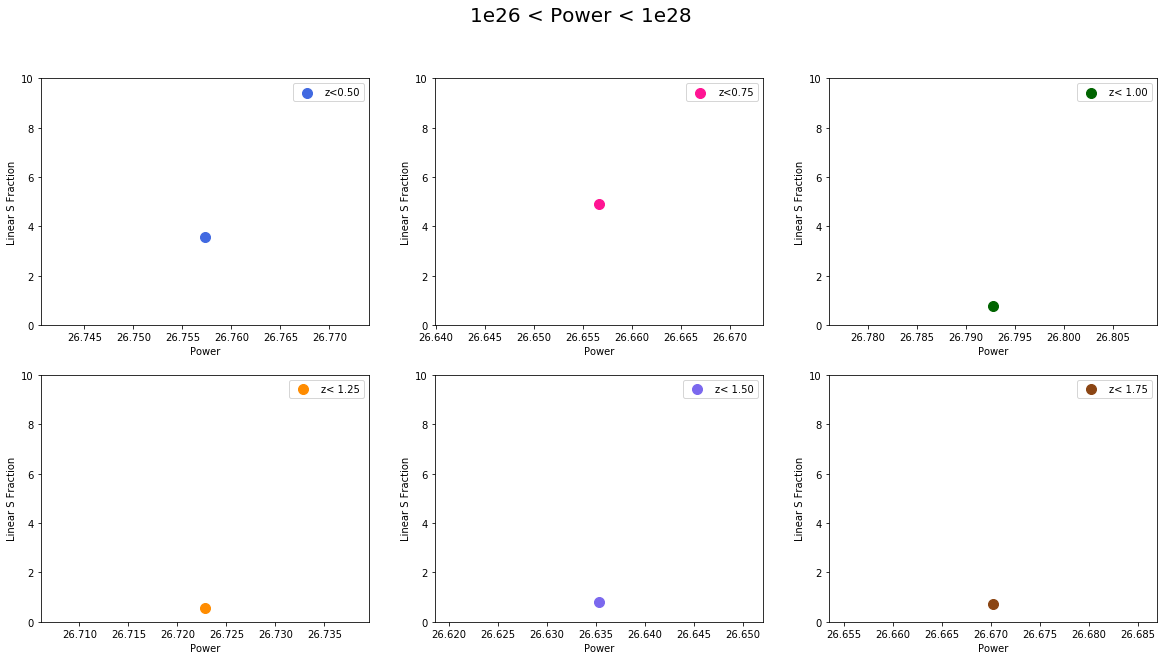

In [605]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.scatter(np.log10(5.718712371704755e+26),3.554018352504609, c='royalblue',s = 100,label='z<0.50')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(4.535335360840438e+26),4.923610180397334, c='deeppink',s = 100,label='z<0.75')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.legend()
ax2.set_ylim(0,10)

ax3.scatter(np.log10(6.205111372992625e+26),0.7852137756961953, c='darkgreen',s = 100,label='z< 1.00')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()


ax4.scatter(np.log10(5.2822188536637755e+26),0.5682738225908143, c = 'darkorange',s = 100, label = 'z< 1.25')
ax4.set_ylim(0,10)
ax4.set_xlabel('Power')
ax4.set_ylabel('Linear S Fraction')
ax4.legend(loc=1)

ax5.scatter(np.log10(4.318410891144551e+26),0.8125293154453135, c='mediumslateblue',s = 100,label='z< 1.50')
ax5.set_xlabel('Power')
ax5.set_ylabel('Linear S Fraction')
ax5.set_ylim(0,10)
ax5.legend(loc=1)

ax6.scatter(np.log10(4.679258778291769e+26),0.7375297598469234, c='saddlebrown',s = 100,label='z< 1.75')
ax6.set_xlabel('Power')
ax6.set_ylabel('Linear S Fraction')
ax6.set_ylim(0,10)
ax6.legend()

plt.suptitle('1e26 < Power < 1e28', fontsize=20)
plt.show()

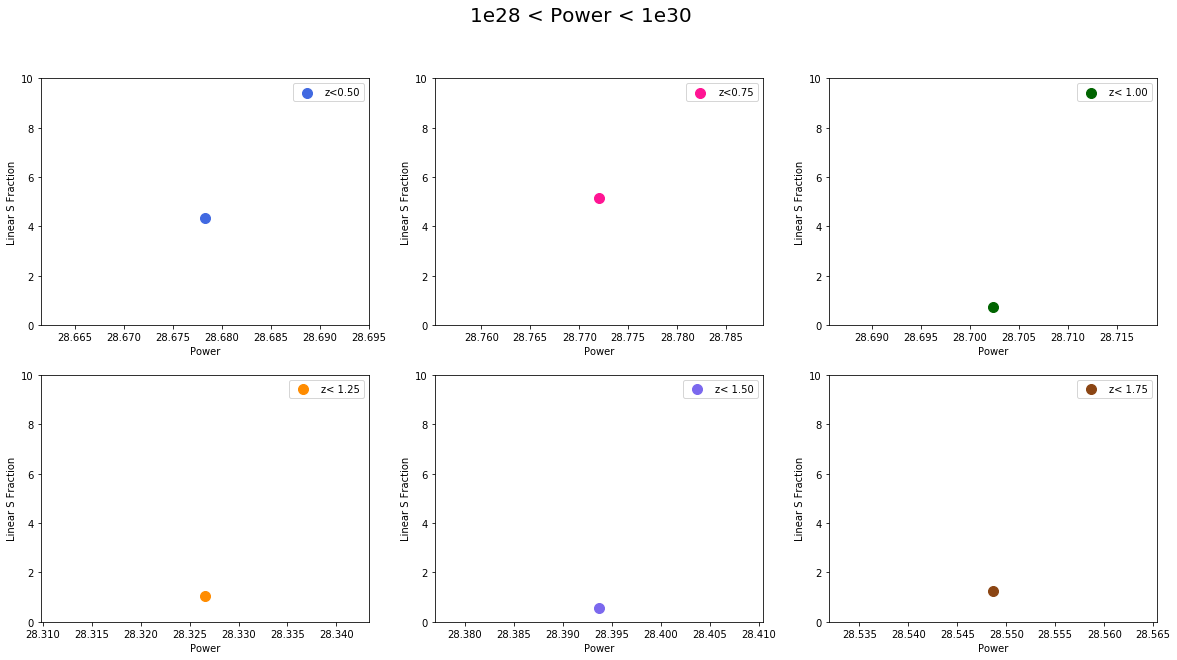

In [606]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.scatter(np.log10(4.767527442434798e+28),4.343551251856674, c='royalblue',s = 100,label='z<0.50')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(5.915639800428714e+28), 5.136689867797267 , c='deeppink',s = 100,label='z<0.75')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.legend()
ax2.set_ylim(0,10)

ax3.scatter(np.log10(5.039115193657703e+28),0.7349625945645273, c='darkgreen',s = 100,label='z< 1.00')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()


ax4.scatter(np.log10(2.121152919415858e+28),1.042110685274014, c = 'darkorange',s = 100, label = 'z< 1.25')
ax4.set_ylim(0,10)
ax4.set_xlabel('Power')
ax4.set_ylabel('Linear S Fraction')
ax4.legend(loc=1)

ax5.scatter(np.log10(2.475692507581263e+28),0.5777037732975256, c='mediumslateblue',s = 100,label='z< 1.50')
ax5.set_xlabel('Power')
ax5.set_ylabel('Linear S Fraction')
ax5.set_ylim(0,10)
ax5.legend(loc=1)

ax6.scatter(np.log10(3.536845318848249e+28),1.2610919808985164, c='saddlebrown',s = 100,label='z< 1.75')
ax6.set_xlabel('Power')
ax6.set_ylabel('Linear S Fraction')
ax6.set_ylim(0,10)
ax6.legend()

plt.suptitle('1e28 < Power < 1e30', fontsize=20)
plt.show()

In [608]:
print (median(Bin1_rg,Z_rg1,1.75,2.00,24)/Median(Bin1_qso,Z_qso1,1.75,2.00),
median(Bin2_rg,Z_rg2,1.75,2.00,13)/Median(Bin2_qso,Z_qso2,1.75,2.00),
median(Bin3_rg,Z_rg3,1.75,2.00,6)/Median(Bin3_qso,Z_qso3,1.75,2.00))

0.658626976555667 0.6402544281576332 2.812243005620877


In [611]:
statistics.median(Selection(pz1,z1,1.75,2.00))

1.076633237284778e+25

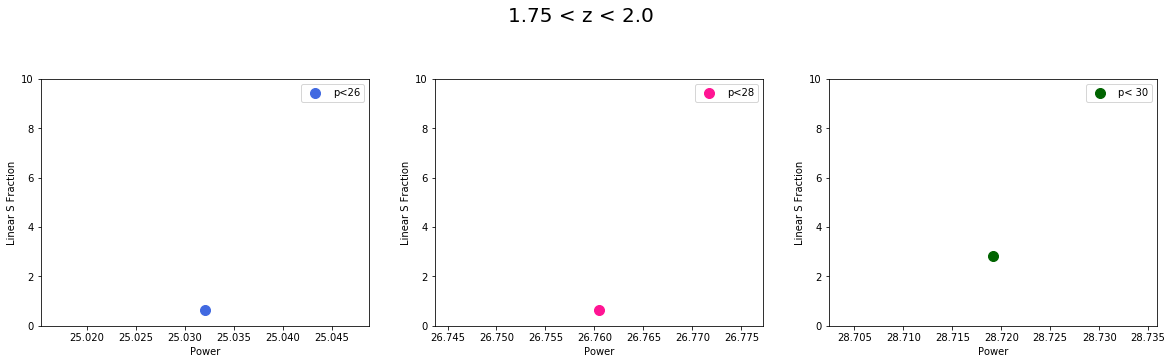

In [613]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)


ax1.scatter(np.log10(1.076633237284778e+25),0.658626976555667, c='royalblue',s = 100,label='p<26')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(5.760341242734956e+26),0.6402544281576332, c='deeppink',s = 100,label='p<28')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.legend()
ax2.set_ylim(0,10)

ax3.scatter(np.log10(5.237573279238907e+28),2.812243005620877, c='darkgreen',s = 100,label='p< 30')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()




plt.suptitle('1.75 < z < 2.0', fontsize=20)
plt.show()